# Pipeline End-to-End Regresi Model Machine Learning

## 1. Import Library dan Pengumpulan Data
Pada tahap ini, kita akan mengimpor library yang dibutuhkan dan memuat dataset untuk analisis.


In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set tampilan grafik
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Membaca dataset tanpa header
data = pd.read_csv("RegresiUTSTelkom.csv", header=None)

# Menambahkan nama kolom
data.columns = ['Target'] + [f'Feature_{i+1}' for i in range(data.shape[1] - 1)]

# Memeriksa data setelah penambahan nama kolom
print("Data awal:")
print(data.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(data.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())

Data awal:
   Target  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0    2001   49.94357   21.47114   73.07750    8.74861  -17.40628  -13.09905   
1    2001   48.73215   18.42930   70.32679   12.94636  -10.32437  -24.83777   
2    2001   50.95714   31.85602   55.81851   13.41693   -6.57898  -18.54940   
3    2001   48.24750   -1.89837   36.29772    2.58776    0.97170  -26.21683   
4    2001   50.97020   42.20998   67.09964    8.46791  -15.85279  -16.81409   

   Feature_7  Feature_8  Feature_9  ...  Feature_81  Feature_82  Feature_83  \
0  -25.01202  -12.23257    7.83089  ...    13.01620   -54.40548    58.99367   
1    8.76630   -0.92019   18.76548  ...     5.66812   -19.68073    33.04964   
2   -3.27872   -2.35035   16.07017  ...     3.03800    26.05866   -50.92779   
3    5.05097  -10.34124    3.55005  ...    34.57337  -171.70734   -16.96705   
4  -12.48207   -9.37636   12.63699  ...     9.92661   -55.95724    64.92712   

   Feature_84  Feature_85  Feature_86  

## 2. Eksplorasi dan Pembersihan Data
Pada tahap ini, kita akan melakukan eksplorasi dan pembersihan data untuk memastikan data siap digunakan.


### Memeriksa nilai kosong (missing values)


In [2]:
print("\nJumlah nilai kosong per kolom:")
print(data.isnull().sum())


Jumlah nilai kosong per kolom:
Target        0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
             ..
Feature_86    0
Feature_87    0
Feature_88    0
Feature_89    0
Feature_90    0
Length: 91, dtype: int64


### Memeriksa apakah ada nilai duplikat


In [3]:
print(f"\nJumlah baris duplikat: {data.duplicated().sum()}")


Jumlah baris duplikat: 214


#### Menghapus data duplikat

In [4]:
data = data.drop_duplicates()

#### Memeriksa kembali apakah ada nilai duplikat

In [5]:
print(f"\nJumlah baris duplikat: {data.duplicated().sum()}")


Jumlah baris duplikat: 0


### Visualisasi distribusi target


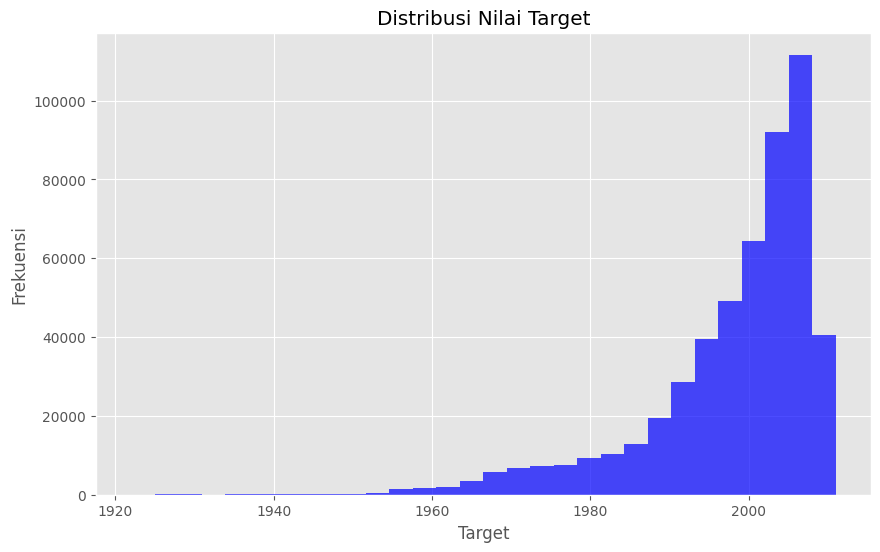

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(data['Target'], bins=30, alpha=0.7, color='blue')
plt.title('Distribusi Nilai Target')
plt.xlabel('Target')
plt.ylabel('Frekuensi')
plt.show()

### Memeriksa korelasi antara Target dengan fitur lainnya


In [7]:
correlation_with_target = data.corr()['Target'].drop('Target').sort_values(ascending=False)
print("\nKorelasi fitur dengan Target (10 teratas):")
print(correlation_with_target.head(10))
print("\nKorelasi fitur dengan Target (10 terbawah):")
print(correlation_with_target.tail(10))


Korelasi fitur dengan Target (10 teratas):
Feature_1     0.225345
Feature_7     0.110460
Feature_47    0.096069
Feature_20    0.087074
Feature_73    0.083760
Feature_74    0.081745
Feature_68    0.081382
Feature_14    0.078721
Feature_38    0.074450
Feature_53    0.074042
Name: Target, dtype: float64

Korelasi fitur dengan Target (10 terbawah):
Feature_57   -0.096993
Feature_12   -0.097099
Feature_69   -0.099486
Feature_36   -0.101051
Feature_46   -0.101340
Feature_67   -0.102841
Feature_40   -0.123996
Feature_63   -0.126320
Feature_3    -0.139574
Feature_6    -0.187441
Name: Target, dtype: float64


### Visualisasi korelasi target dengan beberapa fitur teratas

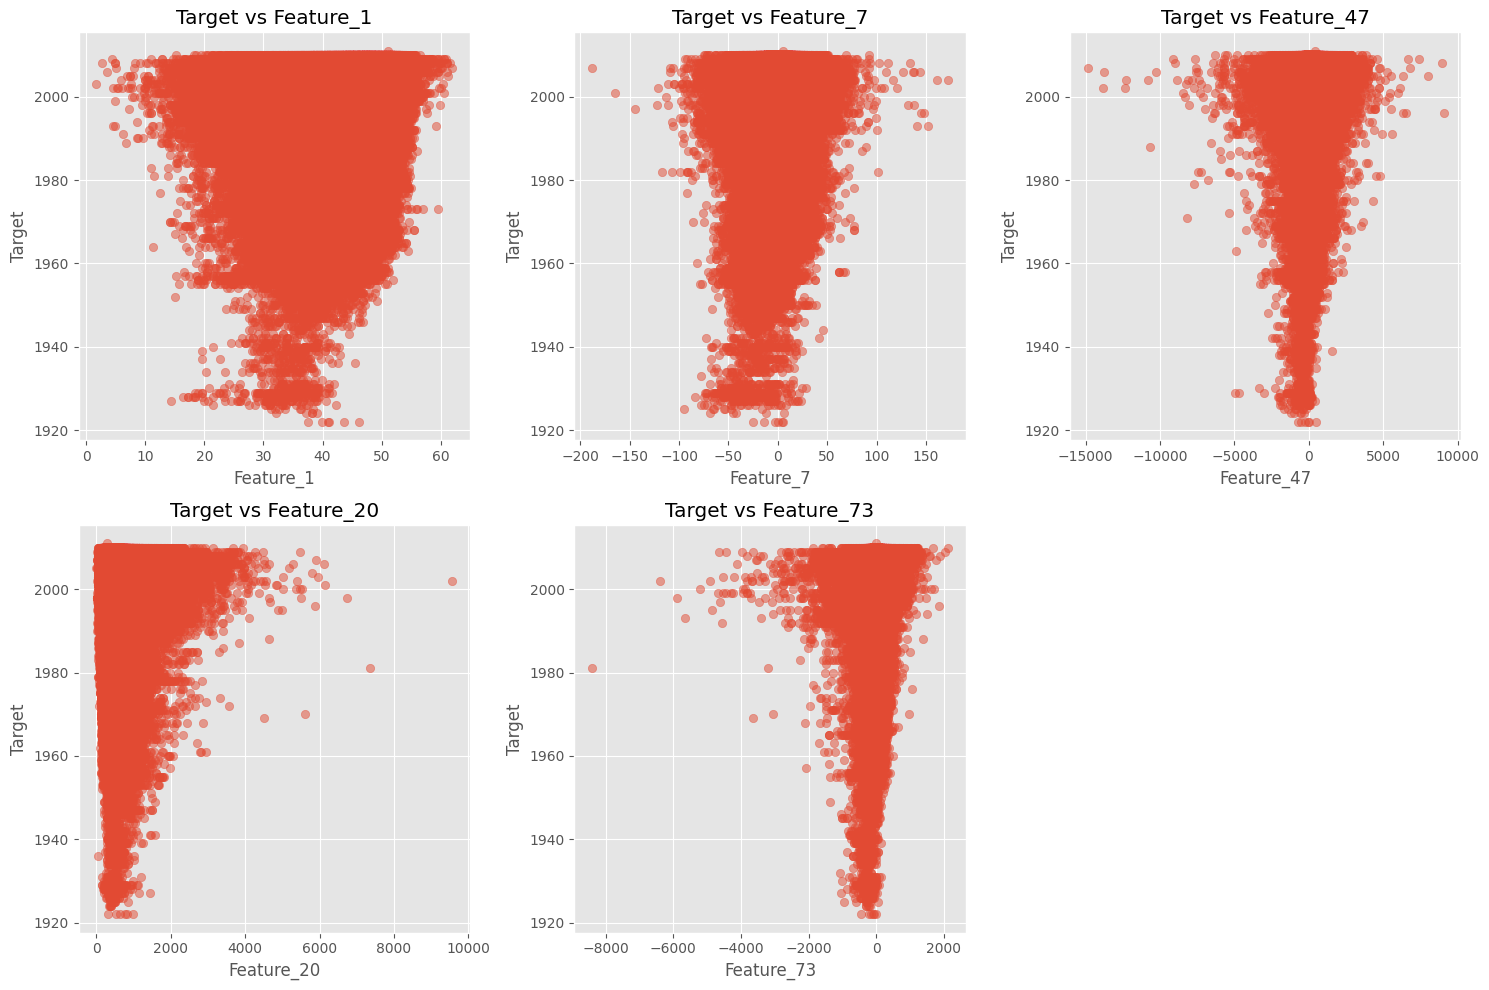

In [8]:
top_features = correlation_with_target.head(5).index
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(data[feature], data['Target'], alpha=0.5)
    plt.title(f'Target vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Target')
plt.tight_layout()
plt.show()

### Memisahkan fitur dan target


In [9]:
X = data.drop('Target', axis=1)
y = data['Target']

In [10]:
print(X)

        Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0        49.94357   21.47114   73.07750    8.74861  -17.40628  -13.09905   
1        48.73215   18.42930   70.32679   12.94636  -10.32437  -24.83777   
2        50.95714   31.85602   55.81851   13.41693   -6.57898  -18.54940   
3        48.24750   -1.89837   36.29772    2.58776    0.97170  -26.21683   
4        50.97020   42.20998   67.09964    8.46791  -15.85279  -16.81409   
...           ...        ...        ...        ...        ...        ...   
515340   51.28467   45.88068   22.19582   -5.53319   -3.61835  -16.36914   
515341   49.87870   37.93125   18.65987   -3.63581  -27.75665  -18.52988   
515342   45.12852   12.65758  -38.72018    8.80882  -29.29985   -2.28706   
515343   44.16614   32.38368   -3.34971   -2.49165  -19.59278  -18.67098   
515344   51.85726   59.11655   26.39436   -5.46030  -20.69012  -19.95528   

        Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_81  \
0       -25.012

In [11]:
print(y)

0         2001
1         2001
2         2001
3         2001
4         2001
          ... 
515340    2006
515341    2006
515342    2006
515343    2006
515344    2005
Name: Target, Length: 515131, dtype: int64


## 3. Feature Selection
Pada tahap ini, kita akan melakukan seleksi fitur untuk memilih fitur yang paling berpengaruh.


### 3.1 Menghapus Fitur dengan Varians Konstan atau Quasi-Konstan

In [12]:
# Menghapus fitur dengan varians rendah
print("\n--- Feature Selection: Variance Threshold ---")
var_threshold = VarianceThreshold(threshold=0.01)
X_var = var_threshold.fit_transform(X)
print(f"Jumlah fitur setelah menghapus fitur dengan varians rendah: {X_var.shape[1]}")

# Mendapatkan nama fitur yang dipertahankan
var_support = var_threshold.get_support()
var_features = X.columns[var_support]
print("Fitur yang dipertahankan setelah Variance Threshold:")
print(var_features.tolist())


--- Feature Selection: Variance Threshold ---
Jumlah fitur setelah menghapus fitur dengan varians rendah: 90
Fitur yang dipertahankan setelah Variance Threshold:
['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30', 'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39', 'Feature_40', 'Feature_41', 'Feature_42', 'Feature_43', 'Feature_44', 'Feature_45', 'Feature_46', 'Feature_47', 'Feature_48', 'Feature_49', 'Feature_50', 'Feature_51', 'Feature_52', 'Feature_53', 'Feature_54', 'Feature_55', 'Feature_56', 'Feature_57', 'Feature_58', 'Feature_59', 'Feature_60', 'Feat

### 3.2 Menghapus Fitur yang Duplikat


In [13]:
# Mendeteksi fitur duplikat berdasarkan korelasi
print("\n--- Feature Selection: Menghapus Fitur Duplikat ---")
correlation_matrix = X[var_features].corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print(f"Fitur yang akan dihapus karena duplikasi: {to_drop}")
non_duplicate_features = [feature for feature in var_features if feature not in to_drop]
print(f"Jumlah fitur setelah menghapus duplikat: {len(non_duplicate_features)}")



--- Feature Selection: Menghapus Fitur Duplikat ---
Fitur yang akan dihapus karena duplikasi: []
Jumlah fitur setelah menghapus duplikat: 90


### 3.3 Seleksi Fitur Berdasarkan Korelasi

In [14]:
# Seleksi berdasarkan korelasi dengan target
print("\n--- Feature Selection: Berdasarkan Korelasi ---")
correlation_with_target = X[non_duplicate_features].corrwith(y).abs().sort_values(ascending=False)
print("Korelasi fitur dengan target (10 teratas):")
print(correlation_with_target.head(10))

# Memilih fitur dengan korelasi di atas threshold
correlation_threshold = 0.1
selected_corr_features = correlation_with_target[correlation_with_target > correlation_threshold].index.tolist()
print(f"Jumlah fitur dengan korelasi > {correlation_threshold}: {len(selected_corr_features)}")
print("Fitur terpilih berdasarkan korelasi:")
print(selected_corr_features)


--- Feature Selection: Berdasarkan Korelasi ---
Korelasi fitur dengan target (10 teratas):
Feature_1     0.225345
Feature_6     0.187441
Feature_3     0.139574
Feature_63    0.126320
Feature_40    0.123996
Feature_7     0.110460
Feature_67    0.102841
Feature_46    0.101340
Feature_36    0.101051
Feature_69    0.099486
dtype: float64
Jumlah fitur dengan korelasi > 0.1: 9
Fitur terpilih berdasarkan korelasi:
['Feature_1', 'Feature_6', 'Feature_3', 'Feature_63', 'Feature_40', 'Feature_7', 'Feature_67', 'Feature_46', 'Feature_36']


### 3.4 Seleksi Fitur dengan Mutual Information


#### Mutual information untuk feature selection


In [15]:
print("\n--- Feature Selection: Mutual Information ---")
X_selected = X[non_duplicate_features]
mi_selector = SelectKBest(mutual_info_regression, k=20)
mi_selector.fit(X_selected, y)
mi_scores = pd.Series(mi_selector.scores_, index=X_selected.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print("Mutual Information Scores (10 teratas):")
print(mi_scores.head(10))


--- Feature Selection: Mutual Information ---
Mutual Information Scores (10 teratas):
Feature_1     0.045563
Feature_6     0.028150
Feature_63    0.021949
Feature_46    0.018350
Feature_2     0.017161
Feature_37    0.016326
Feature_3     0.015769
Feature_14    0.015079
Feature_20    0.014735
Feature_36    0.014645
dtype: float64


#### Visualisasi skor Mutual Information


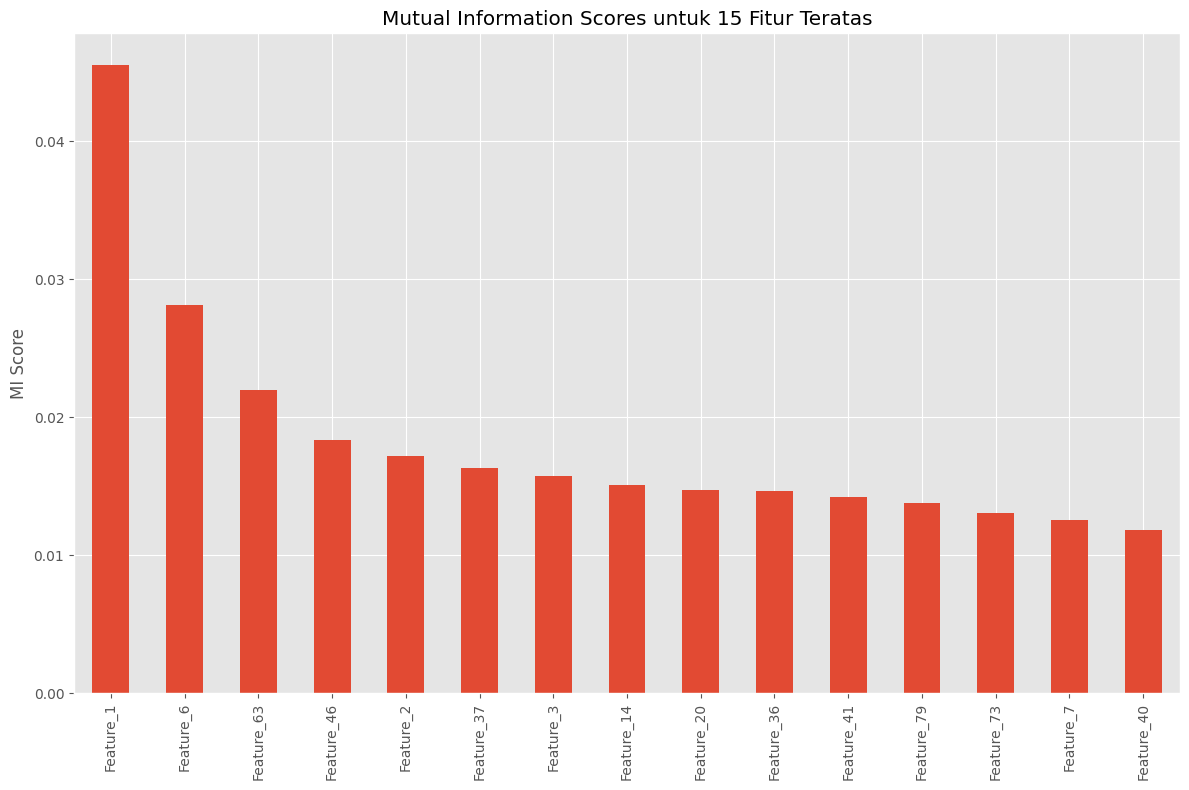

In [16]:
plt.figure(figsize=(12, 8))
mi_scores.head(15).plot(kind='bar')
plt.title('Mutual Information Scores untuk 15 Fitur Teratas')
plt.ylabel('MI Score')
plt.tight_layout()
plt.show()

#### Memilih fitur berdasarkan Mutual Information

In [17]:
selected_mi_features = mi_scores.head(20).index.tolist()
print(f"Fitur terpilih berdasarkan Mutual Information: {len(selected_mi_features)}")
print(selected_mi_features)

Fitur terpilih berdasarkan Mutual Information: 20
['Feature_1', 'Feature_6', 'Feature_63', 'Feature_46', 'Feature_2', 'Feature_37', 'Feature_3', 'Feature_14', 'Feature_20', 'Feature_36', 'Feature_41', 'Feature_79', 'Feature_73', 'Feature_7', 'Feature_40', 'Feature_57', 'Feature_16', 'Feature_47', 'Feature_33', 'Feature_25']


### 3.5 Seleksi Fitur Final


In [18]:
# Mengambil gabungan fitur terpilih dari metode korelasi dan mutual information
final_features = list(set(selected_corr_features + selected_mi_features))
print("\n--- Feature Selection: Final ---")
print(f"Jumlah total fitur terpilih: {len(final_features)}")
print("Fitur akhir yang akan digunakan:")
print(final_features)

# Data final untuk pemodelan
X_final = X[final_features]


--- Feature Selection: Final ---
Jumlah total fitur terpilih: 21
Fitur akhir yang akan digunakan:
['Feature_16', 'Feature_41', 'Feature_7', 'Feature_2', 'Feature_57', 'Feature_79', 'Feature_36', 'Feature_14', 'Feature_25', 'Feature_6', 'Feature_3', 'Feature_37', 'Feature_46', 'Feature_47', 'Feature_33', 'Feature_67', 'Feature_63', 'Feature_73', 'Feature_40', 'Feature_1', 'Feature_20']


## 4. Feature Engineering
Pada tahap ini, kita akan melakukan feature engineering untuk meningkatkan performa model.


### 4.1 Standardisasi Fitur


In [19]:
# Standardisasi fitur
print("\n--- Feature Engineering: Standardisasi ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)
X_scaled_df = pd.DataFrame(X_scaled, columns=final_features)

print("Data setelah standardisasi:")
print(X_scaled_df.head())


--- Feature Engineering: Standardisasi ---
Data setelah standardisasi:
   Feature_16  Feature_41  Feature_7  Feature_2  Feature_57  Feature_79  \
0   -0.747365   -0.301139  -1.552266   0.391338    0.002161    0.251823   
1   -0.967610   -0.268395   0.765629   0.332369   -0.079966    0.409025   
2   -0.842569    0.059821  -0.060910   0.592658    0.288935    0.103313   
3   -0.965931    0.204483   0.510680  -0.061703   -0.071894    0.478957   
4   -1.094453   -0.262529  -0.692451   0.793380   -0.204600    0.470819   

   Feature_36  Feature_14  Feature_25  Feature_6  ...  Feature_37  Feature_46  \
0   -0.676661   -1.045091   -0.423597  -0.278228  ...   -0.198191   -0.453680   
1   -0.424439   -0.218611   -0.193851  -1.191161  ...   -0.605101   -0.337007   
2   -0.407280   -0.994539   -0.389240  -0.702108  ...   -0.056554   -0.247691   
3   -0.342990   -0.151648    0.292088  -1.298412  ...   -0.313042   -0.246371   
4   -0.569388   -0.883220   -0.308139  -0.567151  ...   -0.175102   -0.3

### 4.2 Split Data

In [20]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
print("\n--- Split Data ---")
print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}")


--- Split Data ---
Ukuran data latih: (412104, 21)
Ukuran data uji: (103027, 21)


## 5. Pemodelan dan Evaluasi
Pada tahap ini, kita akan membuat beberapa model regresi dan mengevaluasi performa setiap model.

### Fungsi untuk evaluasi model


In [21]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Melatih model
    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Menampilkan hasil evaluasi
    print(f"\n--- Model: {model_name} ---")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")

    # Visualisasi prediksi vs aktual
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    plt.title(f'{model_name} - Train Data')
    plt.xlabel('Nilai Aktual')
    plt.ylabel('Nilai Prediksi')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{model_name} - Test Data')
    plt.xlabel('Nilai Aktual')
    plt.ylabel('Nilai Prediksi')

    plt.tight_layout()
    plt.show()

    return {
        'model_name': model_name,
        'train_mse': train_mse,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_mse': test_mse,
        'test_rmse': test_rmse,
        'test_r2': test_r2
    }


#### List untuk menyimpan hasil evaluasi semua model


In [22]:
models_results = []

#### 1. Linear Regression


--- Model: Linear Regression ---
Train MSE: 96.2775
Train RMSE: 9.8121
Train R²: 0.1974
Test MSE: 94.8627
Test RMSE: 9.7397
Test R²: 0.1939


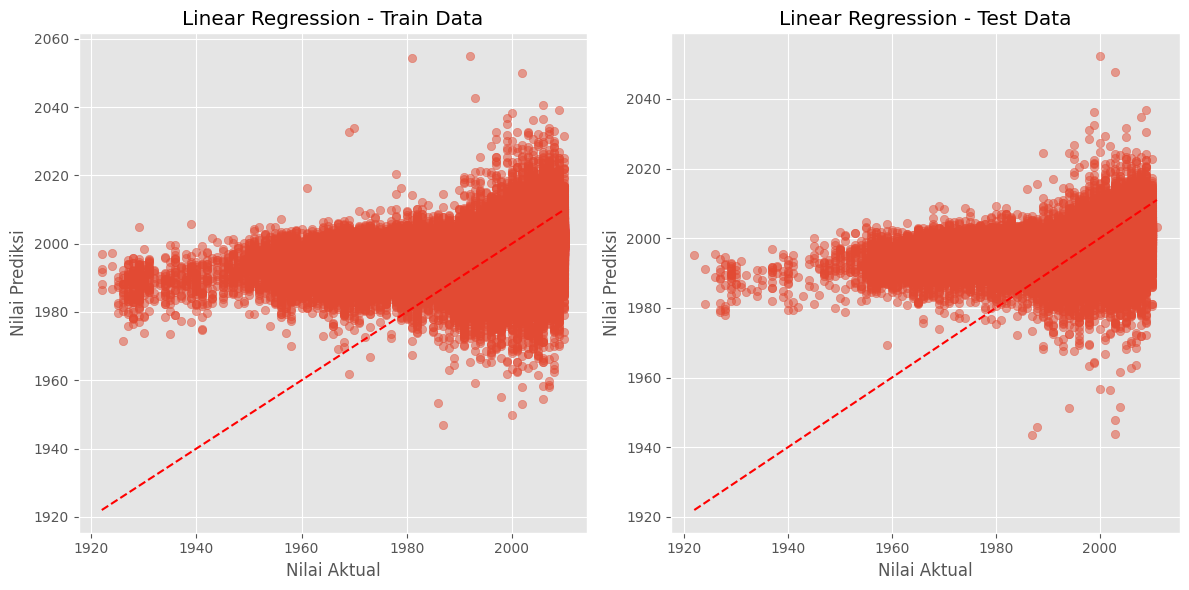

In [23]:
lr_model = LinearRegression()
lr_results = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Linear Regression")
models_results.append(lr_results)

#### 2. Polynomial Regression dengan derajat 2



--- Model: Polynomial Regression (degree=2) ---
Train MSE: 89.4841
Train RMSE: 9.4596
Train R²: 0.2540
Test MSE: 88.1606
Test RMSE: 9.3894
Test R²: 0.2509


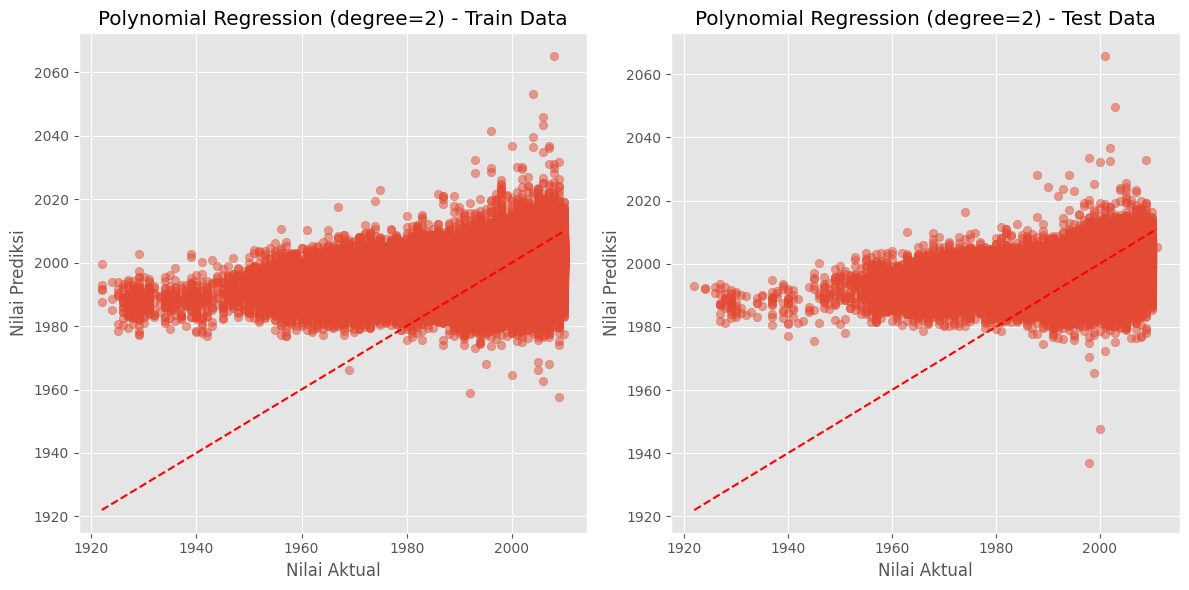

In [24]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_results = evaluate_model(poly_model, X_train_poly, X_test_poly, y_train, y_test, "Polynomial Regression (degree=2)")
models_results.append(poly_results)

#### 3. Decision Tree Regressor



--- Model: Decision Tree Regressor ---
Train MSE: 0.0000
Train RMSE: 0.0044
Train R²: 1.0000
Test MSE: 177.2811
Test RMSE: 13.3147
Test R²: -0.5064


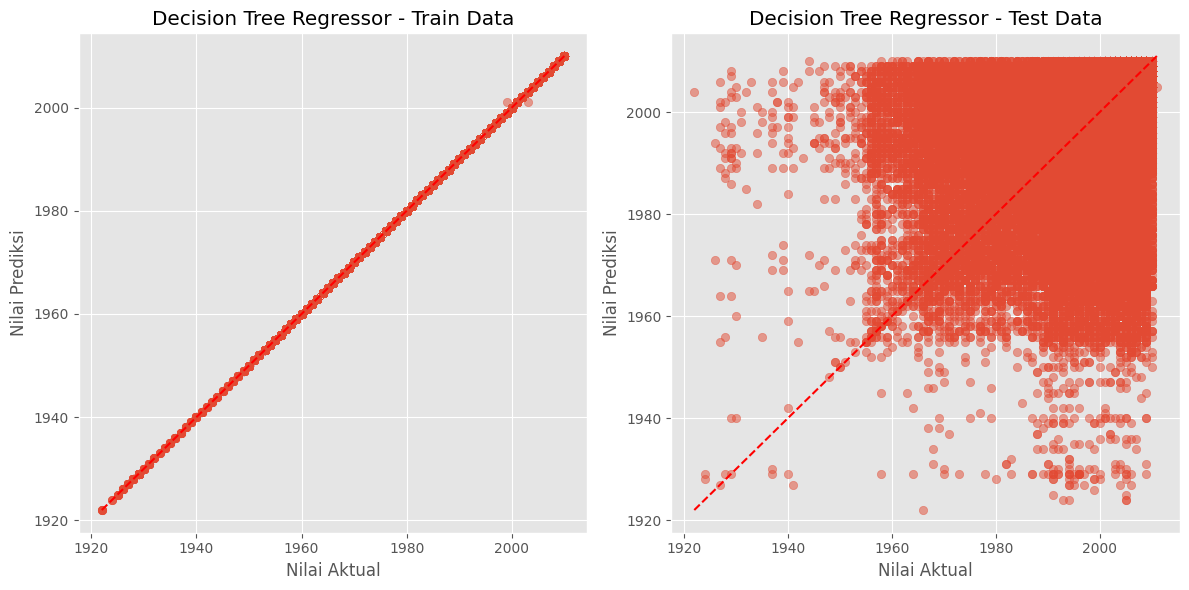

In [25]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_results = evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree Regressor")
models_results.append(dt_results)

#### 4. K-Nearest Neighbors Regressor



--- Model: KNN Regressor ---
Train MSE: 62.9748
Train RMSE: 7.9357
Train R²: 0.4750
Test MSE: 93.5398
Test RMSE: 9.6716
Test R²: 0.2052


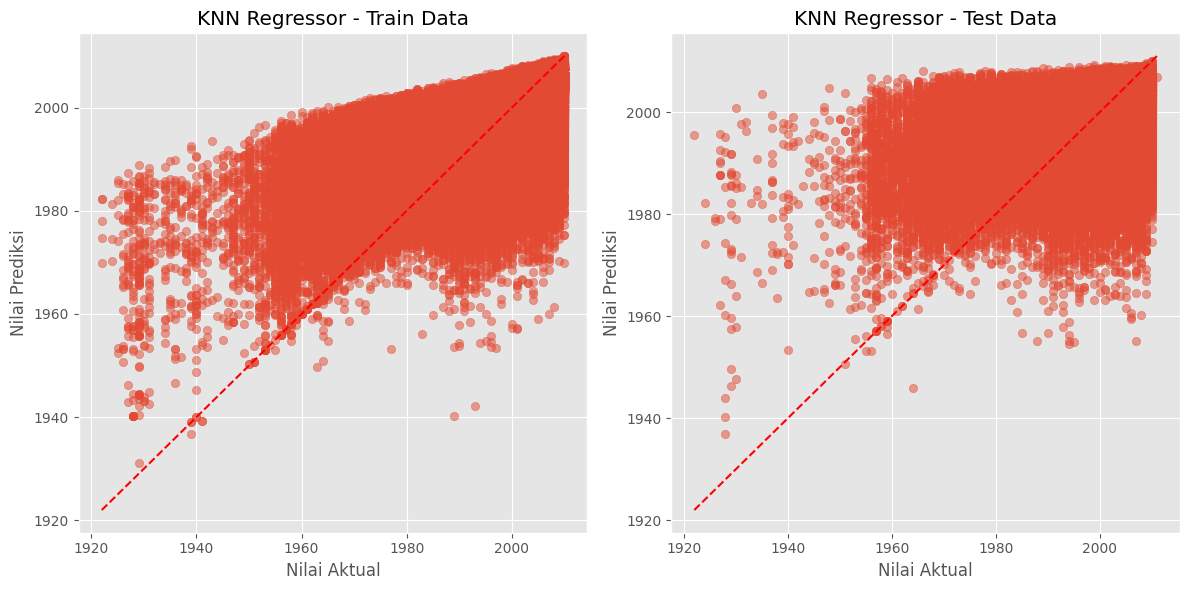

In [26]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_results = evaluate_model(knn_model, X_train, X_test, y_train, y_test, "KNN Regressor")
models_results.append(knn_results)

#### 5. Bagging Regressor dengan Decision Tree sebagai base estimator



--- Model: Bagging Regressor ---
Train MSE: 17.0147
Train RMSE: 4.1249
Train R²: 0.8582
Test MSE: 92.6603
Test RMSE: 9.6260
Test R²: 0.2126


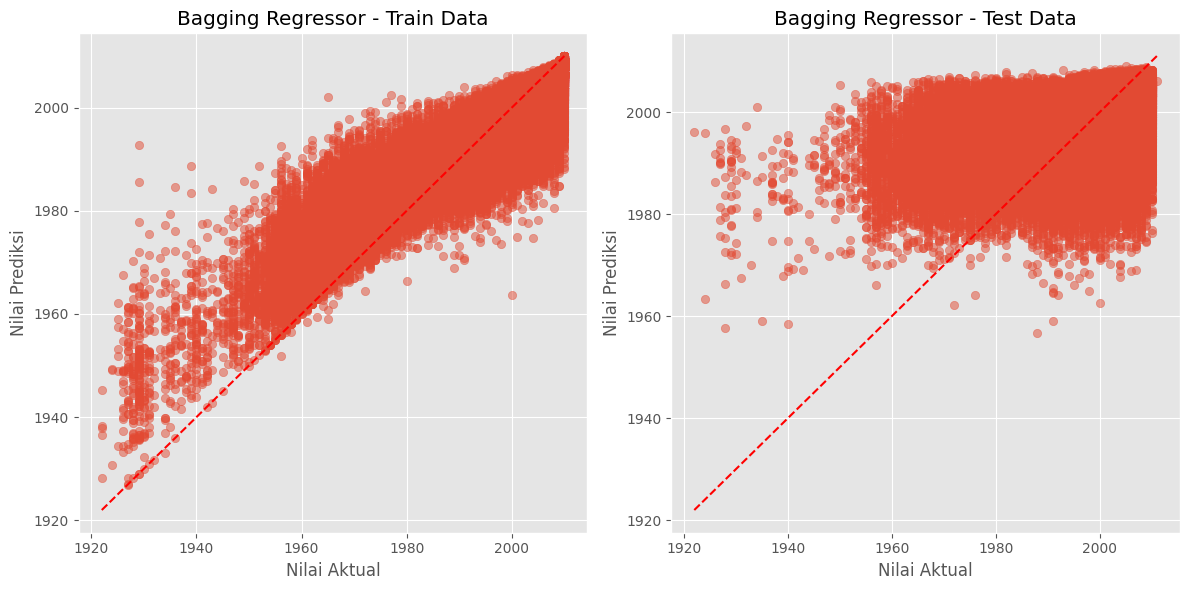

In [27]:
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), n_estimators=10, random_state=42)
bagging_results = evaluate_model(bagging_model, X_train, X_test, y_train, y_test, "Bagging Regressor")
models_results.append(bagging_results)

#### 6. AdaBoost Regressor



--- Model: AdaBoost Regressor ---
Train MSE: 173.2197
Train RMSE: 13.1613
Train R²: -0.4441
Test MSE: 172.9153
Test RMSE: 13.1497
Test R²: -0.4693


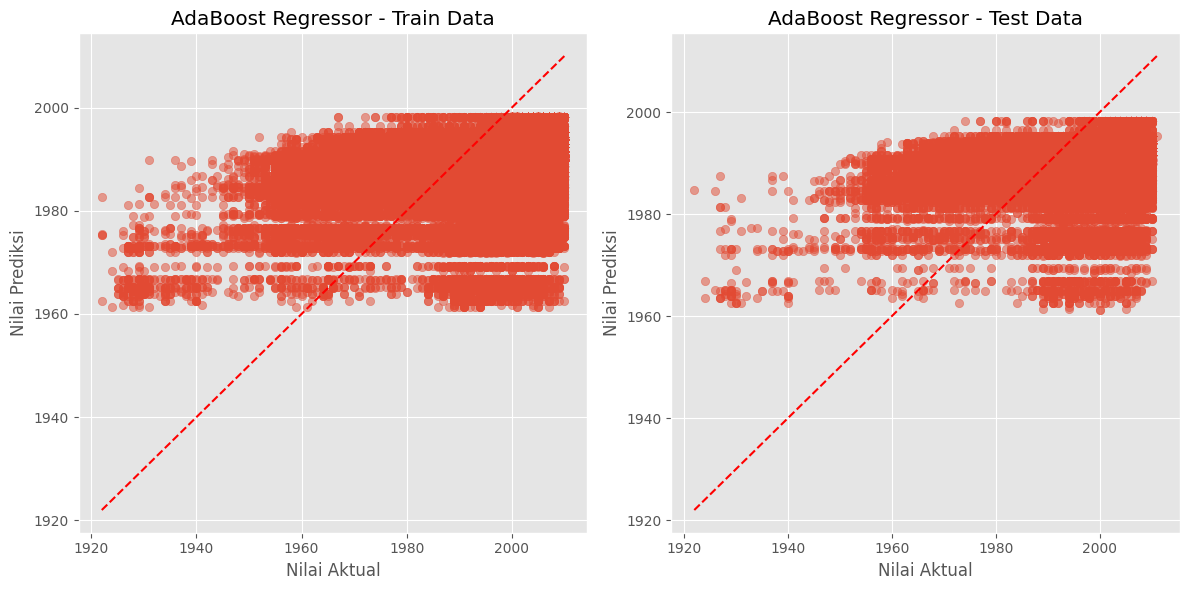

In [28]:
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_results = evaluate_model(adaboost_model, X_train, X_test, y_train, y_test, "AdaBoost Regressor")
models_results.append(adaboost_results)

#### 7. Gradient Boosting Regressor



--- Model: Gradient Boosting Regressor ---
Train MSE: 88.2525
Train RMSE: 9.3943
Train R²: 0.2643
Test MSE: 87.3256
Test RMSE: 9.3448
Test R²: 0.2580


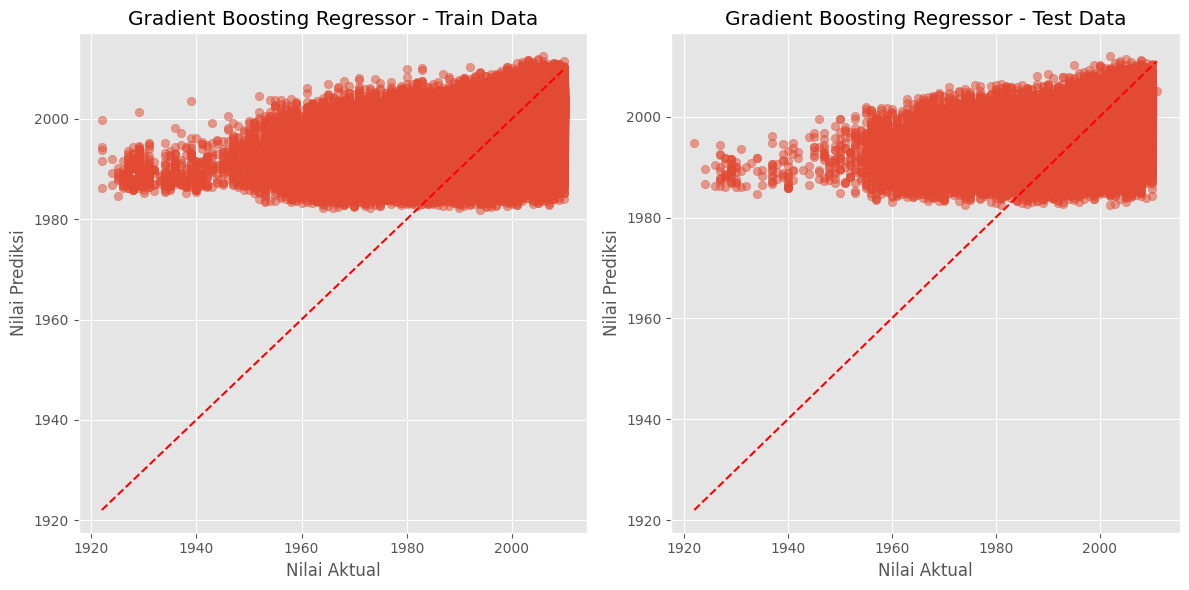

In [29]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_results = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting Regressor")
models_results.append(gb_results)

#### 8. Support Vector Regressor


In [30]:
# svr_model = SVR()
# svr_results = evaluate_model(svr_model, X_train, X_test, y_train, y_test, "Support Vector Regressor")
# models_results.append(svr_results)

#### Membuat DataFrame untuk perbandingan model

In [31]:
comparison_df = pd.DataFrame(models_results)
comparison_df = comparison_df.set_index('model_name')

#### Menampilkan perbandingan model


In [32]:
print("\n--- Perbandingan Performa Model ---")
print(comparison_df)


--- Perbandingan Performa Model ---
                                   train_mse  train_rmse  train_r2  \
model_name                                                           
Linear Regression                  96.277516    9.812111  0.197377   
Polynomial Regression (degree=2)   89.484114    9.459604  0.254010   
Decision Tree Regressor             0.000019    0.004406  1.000000   
KNN Regressor                      62.974751    7.935663  0.475007   
Bagging Regressor                  17.014732    4.124892  0.858156   
AdaBoost Regressor                173.219691   13.161295 -0.444056   
Gradient Boosting Regressor        88.252475    9.394279  0.264278   

                                    test_mse  test_rmse   test_r2  
model_name                                                         
Linear Regression                  94.862696   9.739748  0.193927  
Polynomial Regression (degree=2)   88.160583   9.389387  0.250876  
Decision Tree Regressor           177.281062  13.314693 -0.5

#### Visualisasi perbandingan model berdasarkan RMSE dan R² pada data uji


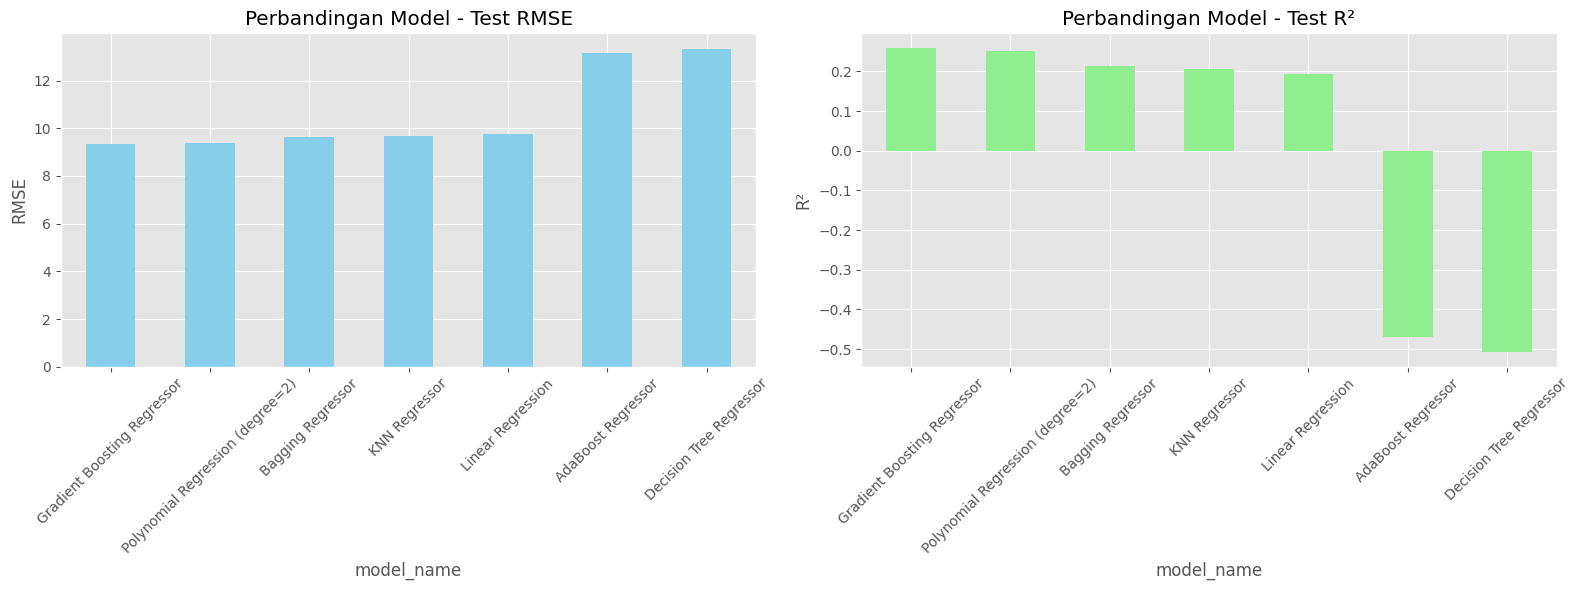

In [33]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
comparison_df['test_rmse'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Perbandingan Model - Test RMSE')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
comparison_df['test_r2'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Perbandingan Model - Test R²')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 6. Analisis Model Terbaik


### Mendapatkan model terbaik berdasarkan R² pada data uji


In [34]:
best_model_r2 = comparison_df['test_r2'].idxmax()
best_r2_value = comparison_df.loc[best_model_r2, 'test_r2']

### Mendapatkan model terbaik berdasarkan RMSE pada data uji


In [35]:
best_model_rmse = comparison_df['test_rmse'].idxmin()
best_rmse_value = comparison_df.loc[best_model_rmse, 'test_rmse']

### Analisis Model Terbaik

In [36]:
print(f"Model dengan R² tertinggi pada data uji: {best_model_r2} (R² = {best_r2_value:.4f})")
print(f"Model dengan RMSE terendah pada data uji: {best_model_rmse} (RMSE = {best_rmse_value:.4f})")

print("\nPenjelasan Model-model yang digunakan:")
print("1. Linear Regression: Model regresi dasar yang memodelkan hubungan linear antara fitur dan target.")
print("2. Polynomial Regression: Menggunakan fitur polinomial untuk menangkap hubungan non-linear.")
print("3. Decision Tree Regressor: Membagi data menjadi segmen-segmen berdasarkan nilai fitur untuk memprediksi target.")
print("4. KNN Regressor: Menggunakan k tetangga terdekat untuk memprediksi nilai target berdasarkan jarak.")
print("5. Bagging Regressor: Teknik ensemble yang menggunakan beberapa model dasar untuk mengurangi varians.")
print("6. AdaBoost Regressor: Algoritma boosting yang melatih model secara berurutan dengan fokus pada kesalahan sebelumnya.")
print("7. Gradient Boosting Regressor: Algoritma boosting yang membangun model secara berurutan untuk mengurangi kesalahan residual.")
print("8. Support Vector Regressor: Menggunakan hyperplane untuk memodelkan hubungan non-linear dengan transformasi kernel.")

Model dengan R² tertinggi pada data uji: Gradient Boosting Regressor (R² = 0.2580)
Model dengan RMSE terendah pada data uji: Gradient Boosting Regressor (RMSE = 9.3448)

Penjelasan Model-model yang digunakan:
1. Linear Regression: Model regresi dasar yang memodelkan hubungan linear antara fitur dan target.
2. Polynomial Regression: Menggunakan fitur polinomial untuk menangkap hubungan non-linear.
3. Decision Tree Regressor: Membagi data menjadi segmen-segmen berdasarkan nilai fitur untuk memprediksi target.
4. KNN Regressor: Menggunakan k tetangga terdekat untuk memprediksi nilai target berdasarkan jarak.
5. Bagging Regressor: Teknik ensemble yang menggunakan beberapa model dasar untuk mengurangi varians.
6. AdaBoost Regressor: Algoritma boosting yang melatih model secara berurutan dengan fokus pada kesalahan sebelumnya.
7. Gradient Boosting Regressor: Algoritma boosting yang membangun model secara berurutan untuk mengurangi kesalahan residual.
8. Support Vector Regressor: Menggunakan 

In [37]:
print("\nAnalisis Model Terbaik:")
if best_model_r2 == best_model_rmse:
    print(f"Model {best_model_r2} menunjukkan performa terbaik baik dalam R² maupun RMSE.")
else:
    print(f"Model {best_model_r2} memiliki R² tertinggi, sementara {best_model_rmse} memiliki RMSE terendah.")


Analisis Model Terbaik:
Model Gradient Boosting Regressor menunjukkan performa terbaik baik dalam R² maupun RMSE.


### Mengidentifikasi model terbaik secara keseluruhan


In [38]:
print("\nKesimpulan:")
if best_model_r2 == best_model_rmse:
    print(f"Model {best_model_r2} adalah model terbaik secara keseluruhan dengan R² = {best_r2_value:.4f} dan RMSE = {best_rmse_value:.4f}")
else:
    # Pilih model berdasarkan R²
    print(f"Berdasarkan evaluasi menyeluruh, model {best_model_r2} dipilih sebagai model terbaik dengan R² = {best_r2_value:.4f}")

    # Tambahkan penjelasan spesifik untuk model terbaik
    if best_model_r2 == "Gradient Boosting Regressor":
        print("\nGradient Boosting Regressor memiliki performa terbaik karena:")
        print("1. Mampu menangkap pola non-linear dalam data")
        print("2. Menggunakan teknik ensemble yang meminimalkan bias dan varians")
        print("3. Membangun model secara bertahap yang fokus pada kesalahan prediksi sebelumnya")
        print("4. Baik dalam menangani fitur campuran dan outlier")
    elif best_model_r2 == "Linear Regression":
        print("\nLinear Regression memiliki performa terbaik karena:")
        print("1. Cocok untuk data dengan hubungan linear yang kuat")
        print("2. Sederhana dan interpretabel")
        print("3. Memiliki varians rendah dan kecenderungan underfitting yang kecil")
    # Tambahkan penjelasan untuk model lainnya...


Kesimpulan:
Model Gradient Boosting Regressor adalah model terbaik secara keseluruhan dengan R² = 0.2580 dan RMSE = 9.3448


## 7. Kesimpulan


In [39]:
print("\n--- Kesimpulan ---")
print("1. Pipeline End-to-End yang telah diimplementasikan berhasil melakukan:")
print("   - Pengumpulan dan pembersihan data")
print("   - Feature Selection menggunakan berbagai metode (Variance Threshold, Korelasi, Mutual Information)")
print("   - Feature Engineering dengan standardisasi")
print("   - Pemodelan dan evaluasi 8 algoritma regresi")

print("\n2. Perbandingan Matriks Evaluasi:")
print("   - RMSE (Root Mean Squared Error): Mengukur akar kuadrat rata-rata kesalahan prediksi. Semakin kecil semakin baik.")
print("   - MSE (Mean Squared Error): Mengukur rata-rata kuadrat kesalahan prediksi. Penalti lebih besar untuk kesalahan besar.")
print("   - R² (R-squared): Mengukur proporsi variasi target yang dijelaskan oleh model. Semakin mendekati 1 semakin baik.")

print(f"\n3. Model Terbaik: {best_model_r2}")
print(f"   - R² pada data uji: {best_r2_value:.4f}")
print(f"   - RMSE pada data uji: {comparison_df.loc[best_model_r2, 'test_rmse']:.4f}")
print("   - Alasan: Model ini memiliki kemampuan terbaik dalam menangkap pola pada data dan generalisasi yang baik pada data uji.")

print("\n4. Saran untuk Pengembangan Lebih Lanjut:")
print("   - Hyperparameter tuning untuk meningkatkan performa model")
print("   - Mencoba teknik feature engineering lainnya")
print("   - Evaluasi dengan cross-validation untuk estimasi performa yang lebih robust")
print("   - Ensemble dari beberapa model terbaik untuk meningkatkan akurasi prediksi")


--- Kesimpulan ---
1. Pipeline End-to-End yang telah diimplementasikan berhasil melakukan:
   - Pengumpulan dan pembersihan data
   - Feature Selection menggunakan berbagai metode (Variance Threshold, Korelasi, Mutual Information)
   - Feature Engineering dengan standardisasi
   - Pemodelan dan evaluasi 8 algoritma regresi

2. Perbandingan Matriks Evaluasi:
   - RMSE (Root Mean Squared Error): Mengukur akar kuadrat rata-rata kesalahan prediksi. Semakin kecil semakin baik.
   - MSE (Mean Squared Error): Mengukur rata-rata kuadrat kesalahan prediksi. Penalti lebih besar untuk kesalahan besar.
   - R² (R-squared): Mengukur proporsi variasi target yang dijelaskan oleh model. Semakin mendekati 1 semakin baik.

3. Model Terbaik: Gradient Boosting Regressor
   - R² pada data uji: 0.2580
   - RMSE pada data uji: 9.3448
   - Alasan: Model ini memiliki kemampuan terbaik dalam menangkap pola pada data dan generalisasi yang baik pada data uji.

4. Saran untuk Pengembangan Lebih Lanjut:
   - Hyper